In [30]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd


In [33]:
data = pd.read_csv('./Train.csv')
data = data.values
X = data[:,0:5]
y = data[:,5]


In [34]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X.shape)


(1600, 6)


In [37]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    m = X.shape[0]
    y_ = hypothesis(X,theta)
    e = np.sum((y - y_)**2)
    return e/m


def gradient(X,y,theta):
    m = X.shape[0]
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_ - y))            
    return grad/m

def gradientDescent(X,y,learning_rate = 0.1, max_epoch = 300):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    for i in range(max_epoch):
        e = error(X,y,theta)
        error_list.append(e)
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad
            
    return theta,error_list

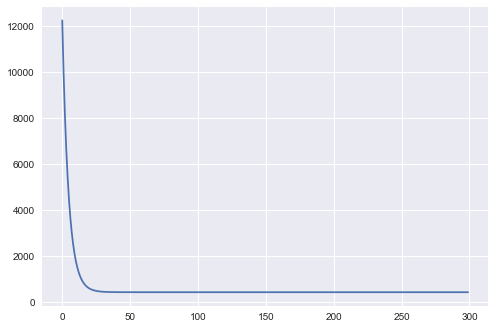

In [38]:
theta,error_list = gradientDescent(X,y)
plt.plot(error_list)
plt.show()

In [39]:
test_data = pd.read_csv('./Test.csv')
X_test = test_data.values
print(X_test.shape)

(400, 5)


In [40]:
ones = np.ones((X_test.shape[0],1))
X_test = np.hstack((ones,X_test))
print(X_test.shape)


(400, 6)


In [45]:
y_ = hypothesis(X_test,theta)

In [50]:
df = pd.DataFrame(data = y_)
df.columns = ["target"]
df.to_csv('air_pred.csv')